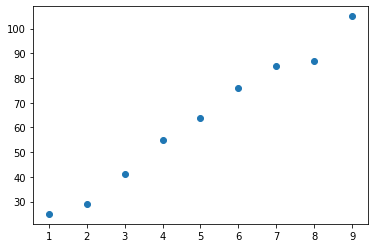

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8,9]) #创建x数组
y = np.array([25,29,41,55,64,76,85,87,105]) #创建y数组

plt.scatter(x, y)
plt.show()

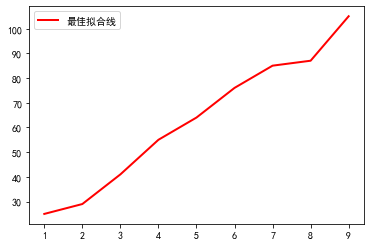

In [2]:
from matplotlib import pyplot as plt
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ["SimHei"]

#绘制最佳拟合线：标签用的是训练数据的预测值y_pred
plt.plot(x,y, color='red', linewidth=2, label="最佳拟合线")

plt.legend(loc=2)

## 案例

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
data=pd.read_excel('student.xlsx')
data

,学习时间,期末分数
0,1,10
1,2,22
2,3,29
3,4,44
4,5,52
5,6,59
6,7,71
7,8,83
8,9,91


In [5]:
x=data[['学习时间']] # 读取成二维形式
y=data['期末分数']

In [6]:
from sklearn.model_selection import train_test_split #导入分割函数
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #0.2表示测试比例为20%
print(X_train.shape) #查看训练集维度
print(X_test.shape) #查看测试集维度
print(y_train.shape) 
print(y_test.shape)

(7, 1)
(2, 1)
(7,)
(2,)


In [7]:
model = LinearRegression() #建立线性模型
model.fit(x,y) # 使用fit函数对数据x和y进行拟合（意味着拟合成某个函数）

LinearRegression()

In [8]:
#回归系数（斜率）
a=model.intercept_
#截距
b=model.coef_[0]

print('拟合线截距b=',b,'，回归系数a=',a)

拟合线截距b= 10.100000000000003 ，回归系数a= 0.7222222222222072


In [9]:
model.predict([[9]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([91.62222222])

In [10]:
from sklearn import metrics
import numpy as np
y_pred=model.predict(X_test) 
#用scikit-learn计算MSE
mse=metrics.mean_squared_error(y_test,y_pred)
print('MES=',mse)
#计算RMSE
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)

MES= 2.7854938271605096
RMSE= 1.6689798761999828


In [11]:
model.score(X_test , y_test)

0.9226251714677636

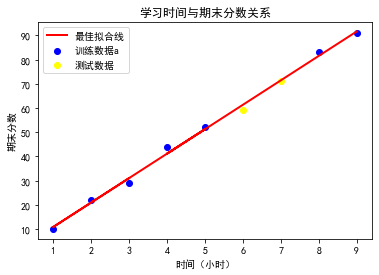

In [12]:
from matplotlib import pyplot as plt
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ["SimHei"]

#绘制训练数据的散点图
plt.scatter(X_train, y_train, color='blue', label="训练数据a")
#predict得到训练数据的预测值
y_pred = model.predict(X_train)
#绘制最佳拟合线：标签用的是训练数据的预测值y_pred
plt.plot(X_train, y_pred, color='red', linewidth=2, label="最佳拟合线")
plt.scatter(X_test, y_test, color='yellow', label="测试数据")
#添加图标标签
plt.legend(loc=2)
plt.xlabel("时间（小时）")
plt.ylabel("期末分数")
plt.title('学习时间与期末分数关系')
#显示图像
plt.show()